In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class BasicNN(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [6]:
class BasicNN_train(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [3]:
input_doses = torch.linspace(start=0, end=1, steps=11)

input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Text(0, 0.5, 'Dose')

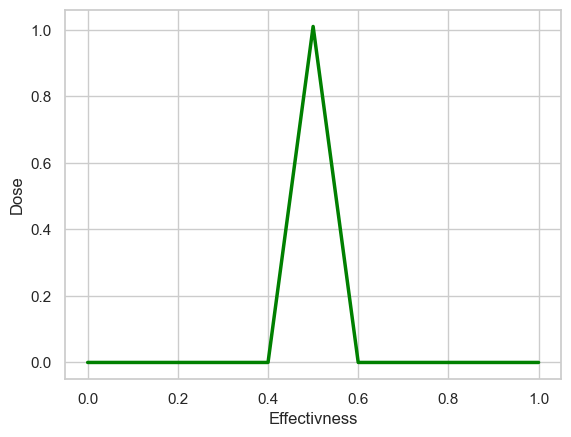

In [7]:
model = BasicNN()

output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)

plt.xlabel('Effectivness')
plt.ylabel('Dose')

In [9]:
model = BasicNN_train()

inputs = torch.tensor([0.0, 0.5, 1.0])
labels = torch.tensor([0.0, 1.0, 0.0])

optimizer = SGD(model.parameters(), lr=0.1)

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

Final bias, before optimization: tensor(0.)



In [10]:
for epoch in range(100):
    
    total_loss = 0
    
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]
        
        output_i = model(input_i)
        
        loss = (output_i - label_i) ** 2
        
        loss.backward()
        
        total_loss += float(loss)
    
    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break
    
    optimizer.step()
    optimizer.zero_grad()
    
    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")

Step :0 Final Bias: tensor(-3.2020)

Step :1 Final Bias: tensor(-5.7636)

Step :2 Final Bias: tensor(-7.8129)

Step :3 Final Bias: tensor(-9.4523)

Step :4 Final Bias: tensor(-10.7638)

Step :5 Final Bias: tensor(-11.8131)

Step :6 Final Bias: tensor(-12.6525)

Step :7 Final Bias: tensor(-13.3240)

Step :8 Final Bias: tensor(-13.8612)

Step :9 Final Bias: tensor(-14.2909)

Step :10 Final Bias: tensor(-14.6348)

Step :11 Final Bias: tensor(-14.9098)

Step :12 Final Bias: tensor(-15.1298)

Step :13 Final Bias: tensor(-15.3059)

Step :14 Final Bias: tensor(-15.4467)

Step :15 Final Bias: tensor(-15.5594)

Step :16 Final Bias: tensor(-15.6495)

Step :17 Final Bias: tensor(-15.7216)

Step :18 Final Bias: tensor(-15.7793)

Step :19 Final Bias: tensor(-15.8254)

Step :20 Final Bias: tensor(-15.8623)

Step :21 Final Bias: tensor(-15.8919)

Step :22 Final Bias: tensor(-15.9155)

Step :23 Final Bias: tensor(-15.9344)

Step :24 Final Bias: tensor(-15.9495)

Step :25 Final Bias: tensor(-15.9616)



Text(0, 0.5, 'Dose')

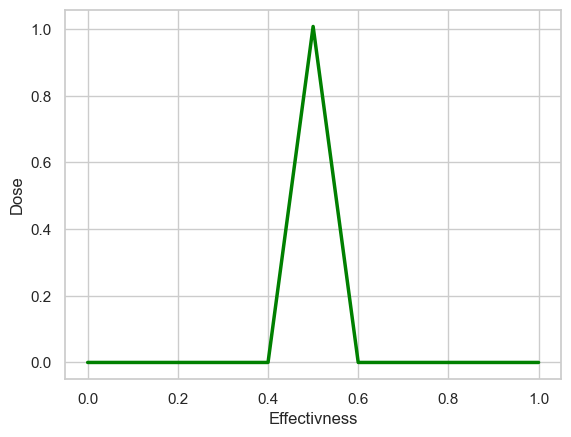

In [11]:
output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)

plt.xlabel('Effectivness')
plt.ylabel('Dose')